In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from plugins import *
%matplotlib inline

# from hist import intervals
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib as mpl

#### test voms connections
# redirector = 'root://xcache/'
redirector='root://cmsxrootd.fnal.gov/'
# files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True)
files = handleData('datasets_UL_NANOAOD.json', redirector, year = 2018, testing = True)
#events = NanoEventsFactory.from_root(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root', schemaclass=NanoAODSchema).events()

# import uproot
# # ### uproot notation
# qcd_mc = uproot.open(list(files.values())[-1][0])
# # qcd_mc = uproot.open(redirector+'/store/mc/RunIISummer20UL18NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/120000/6BEB9A7B-150C-7440-96D8-17A3D87F3225.root')
# uprootevents = qcd_mc['Events']
# print(uprootevents.keys('*df*'))
# print(uprootevents['Generator_xpdf1'].array())
# #### print Q2 scale
# print(uprootevents['Generator_scalePDF'].array())


In [79]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


dict_keys(['jet_mass', 'jet_pt', 'jet_eta', 'btag', 'cutflow', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_mass_reco_over_gen', 'jet_pt_reco', 'jet_pt_gen', 'jet_pt_reco_over_gen', 'jet_eta_reco', 'jet_eta_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_dphi_reco', 'jet_ptasymm_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'jet_sd_mass_reco', 'jet_sd_mass_gen', 'misses_g', 'fakes_g', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'weights', 'systematics'])
['dataset', 'syst', 'ptreco', 'mreco']
[(200.0, 280.0), (280.0, 360.0), (360.0, 450.0), (450.0, 520.0), (520.0, 630.0), (630.0, 690.0), (690.0, 750.0), (750.0, 800.0), (800.0, 1300.0), (1300.0, 13000.0)]
['nominal', 'jesUp', 'jesDown', 'jerUp', 'jerDown']
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Axes(0.125,0.11;0.352273x0.35)
Axes(0.547727,0.11;0.352273x0.35)


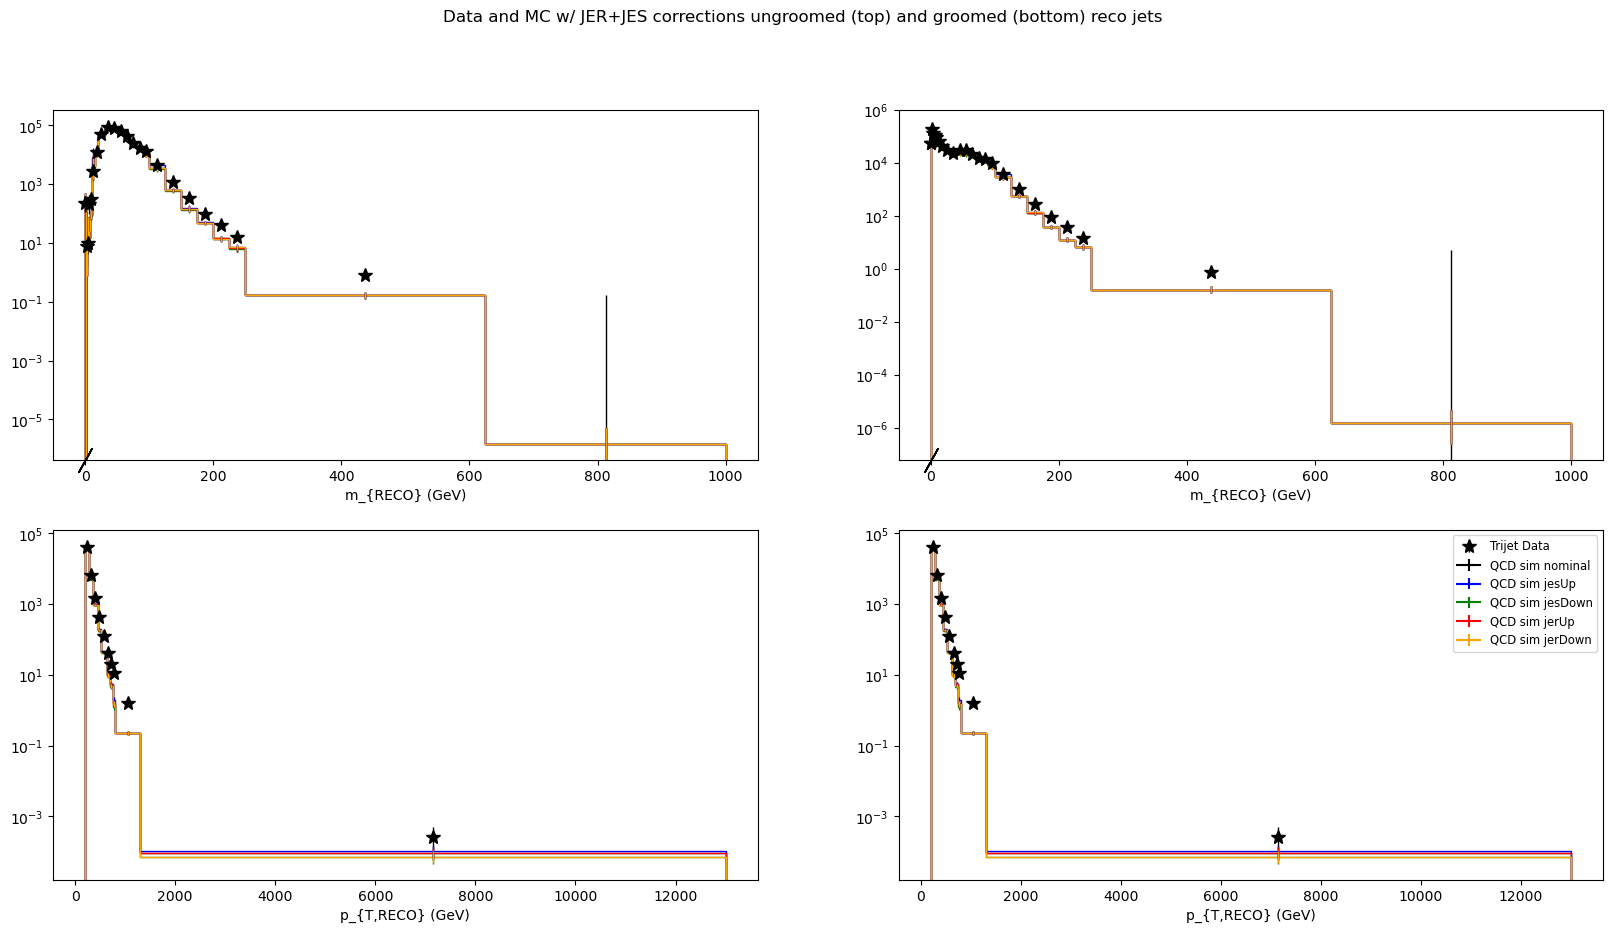

In [85]:
plt.rcParams["figure.figsize"] = (20,10)
print(result_jec.keys())
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
data = [result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('mreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('mreco'),
       result_data['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':'nominal'}].project('ptreco'), 
        result_data['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':'nominal'}].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    print(ax)
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black', linewidth=1,
                         label=['Trijet Data'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('mreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('mreco'),
             result_mc['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst}].project('ptreco'), 
                      result_mc['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst}].project('ptreco')]
        hep.histplot(mc[i]*100, stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])

    plt.rc('legend',fontsize='small')
    plt.legend()

axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')

plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [47]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjecALL.pkl"
with open(fname, "rb") as f:
    result_jec = pickle.load( f )
os_path = 'plots/selectionStudies/dijet/'
checkdir(os_path)

dict_keys(['jet_mass', 'jet_pt', 'jet_eta', 'btag', 'cutflow', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_mass_reco_over_gen', 'jet_pt_reco', 'jet_pt_gen', 'jet_pt_reco_over_gen', 'jet_eta_reco', 'jet_eta_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_dphi_reco', 'jet_ptasymm_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'jet_sd_mass_reco', 'jet_sd_mass_gen', 'misses_g', 'fakes_g', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'weights', 'systematics'])
['dataset', 'syst', 'ptreco', 'mreco']
[(200.0, 280.0), (280.0, 360.0), (360.0, 450.0), (450.0, 520.0), (520.0, 630.0), (630.0, 690.0), (690.0, 750.0), (750.0, 800.0), (800.0, 1300.0), (1300.0, 13000.0)]
3
['nominal', 'jesUp', 'jesDown', 'jerUp', 'jerDown']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


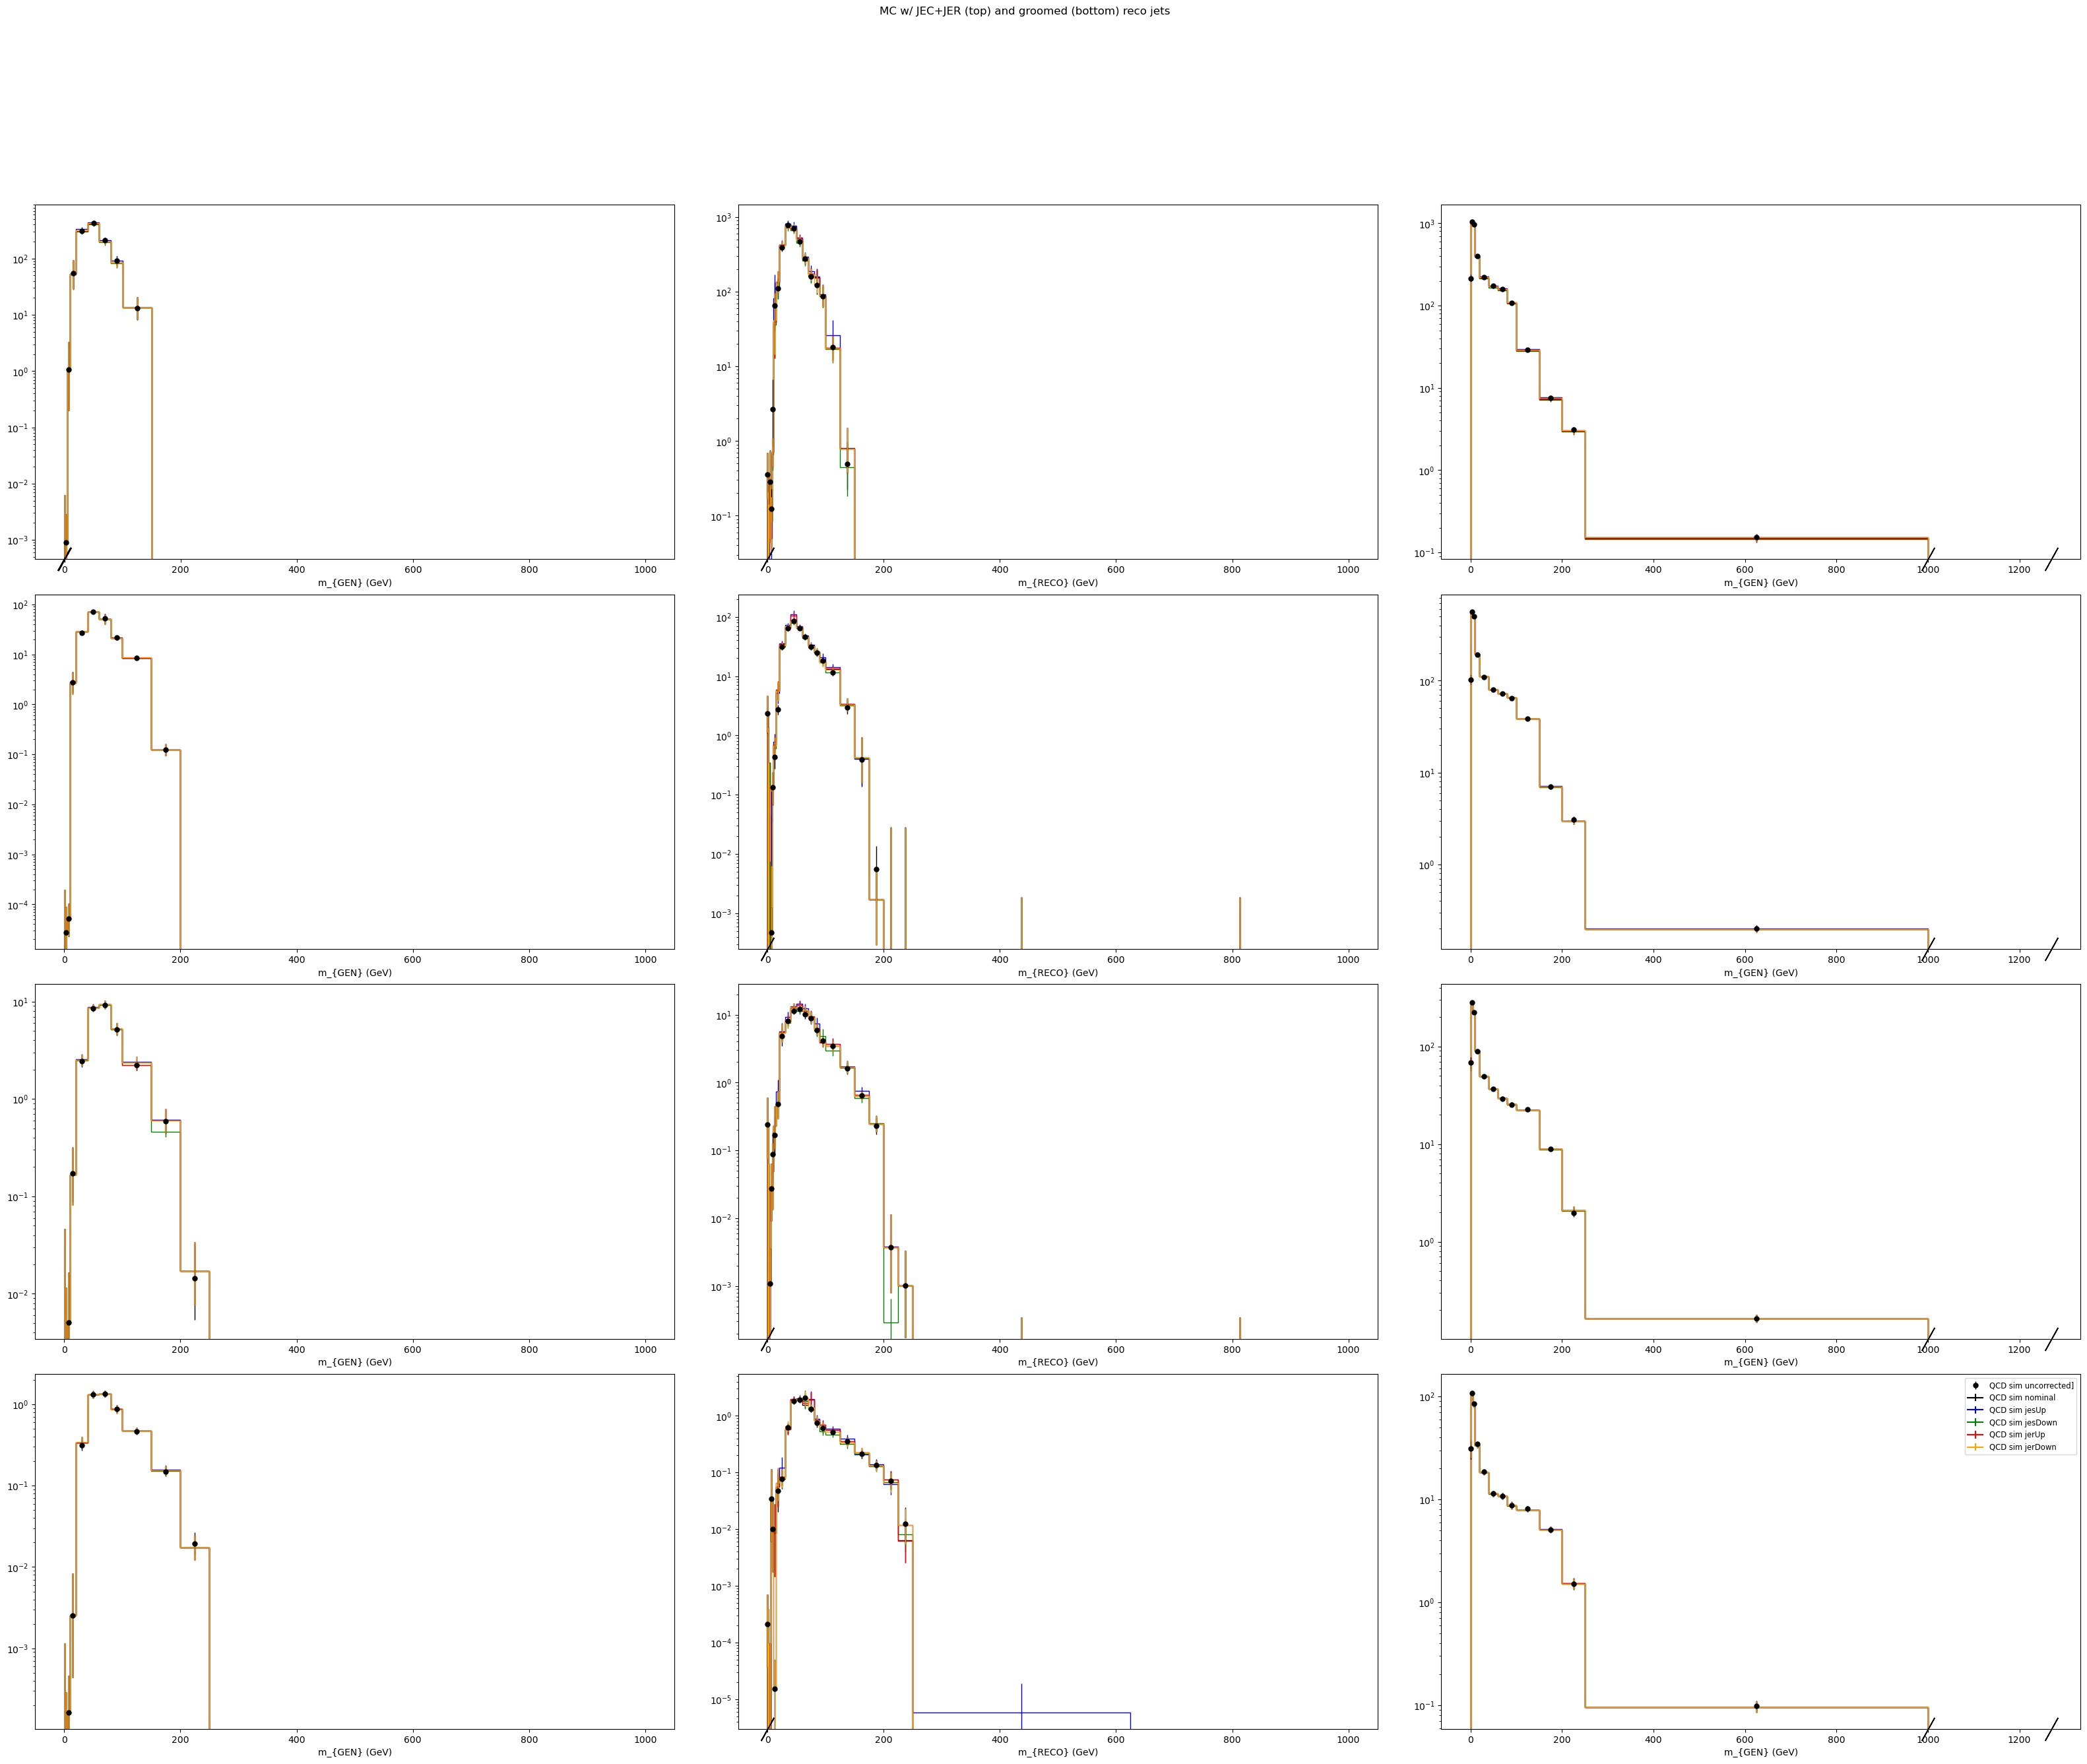

In [66]:
plt.rcParams["figure.figsize"] = (40,30)
print(result_jec.keys())
axis_names = [ax.name for ax in result_jec['jet_pt_mass_reco_u'].axes]
print(axis_names)
cats = [cat for cat in result_jec['jet_pt_mass_reco_u'][{'ptreco':sum, 'dataset':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_jec['jet_pt_mass_reco_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(4, 3)
print(len(axs[0]))
colors = ['k', 'b', 'g', 'r', 'orange']
print(cats)
fig.suptitle('MC w/ JEC+JER (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
for j, ax in enumerate(axs):
    mc = [result['response_matrix_u'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_u'][{'dataset':sum, 'ptreco':j}].project('mreco'), 
      result['response_matrix_g'][{'dataset':sum, 'ptgen':j}].project('mgen'), 
      result['response_matrix_g'][{'dataset':sum, 'ptreco':j}].project('mreco')]
    for i in range(len(axs[0])):
        hep.histplot(mc[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=axs[j,i], density=False, marker =["."], color = 'black', linewidth=1,
                         label=['QCD sim uncorrected]'])
        for id, syst in enumerate(cats):
            mc_jec = [result_jec['response_matrix_u'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_u'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco'), 
                      result_jec['response_matrix_g'][{'dataset':sum, 'syst':syst, 'ptgen':j}].project('mgen'), 
                      result_jec['jet_pt_mass_reco_g'][{'dataset':sum, 'syst':syst, 'ptreco':j}].project('mreco')]
            hep.histplot(mc_jec[i], stack=True, histtype='step', binwnorm=1,
                             ax=axs[j,i], density=False, linestyle =["-"],
                             color = colors[id], linewidth=1,
                             label=['QCD sim '+syst])
    plt.rc('legend',fontsize='small')
    plt.legend()

for ax in axs.flatten():
    ax.set_yscale('log')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(os_path+"/jesjecComparison_MC.png")

In [100]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bb = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print(result_bb['cutflow']['nGluonJets']/result_bb['cutflow']['n3Jets'])
print(result['cutflow']['nGluonJets']/result['cutflow']['n3Jets'])

0.5067628381419071
0.513340373416529


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


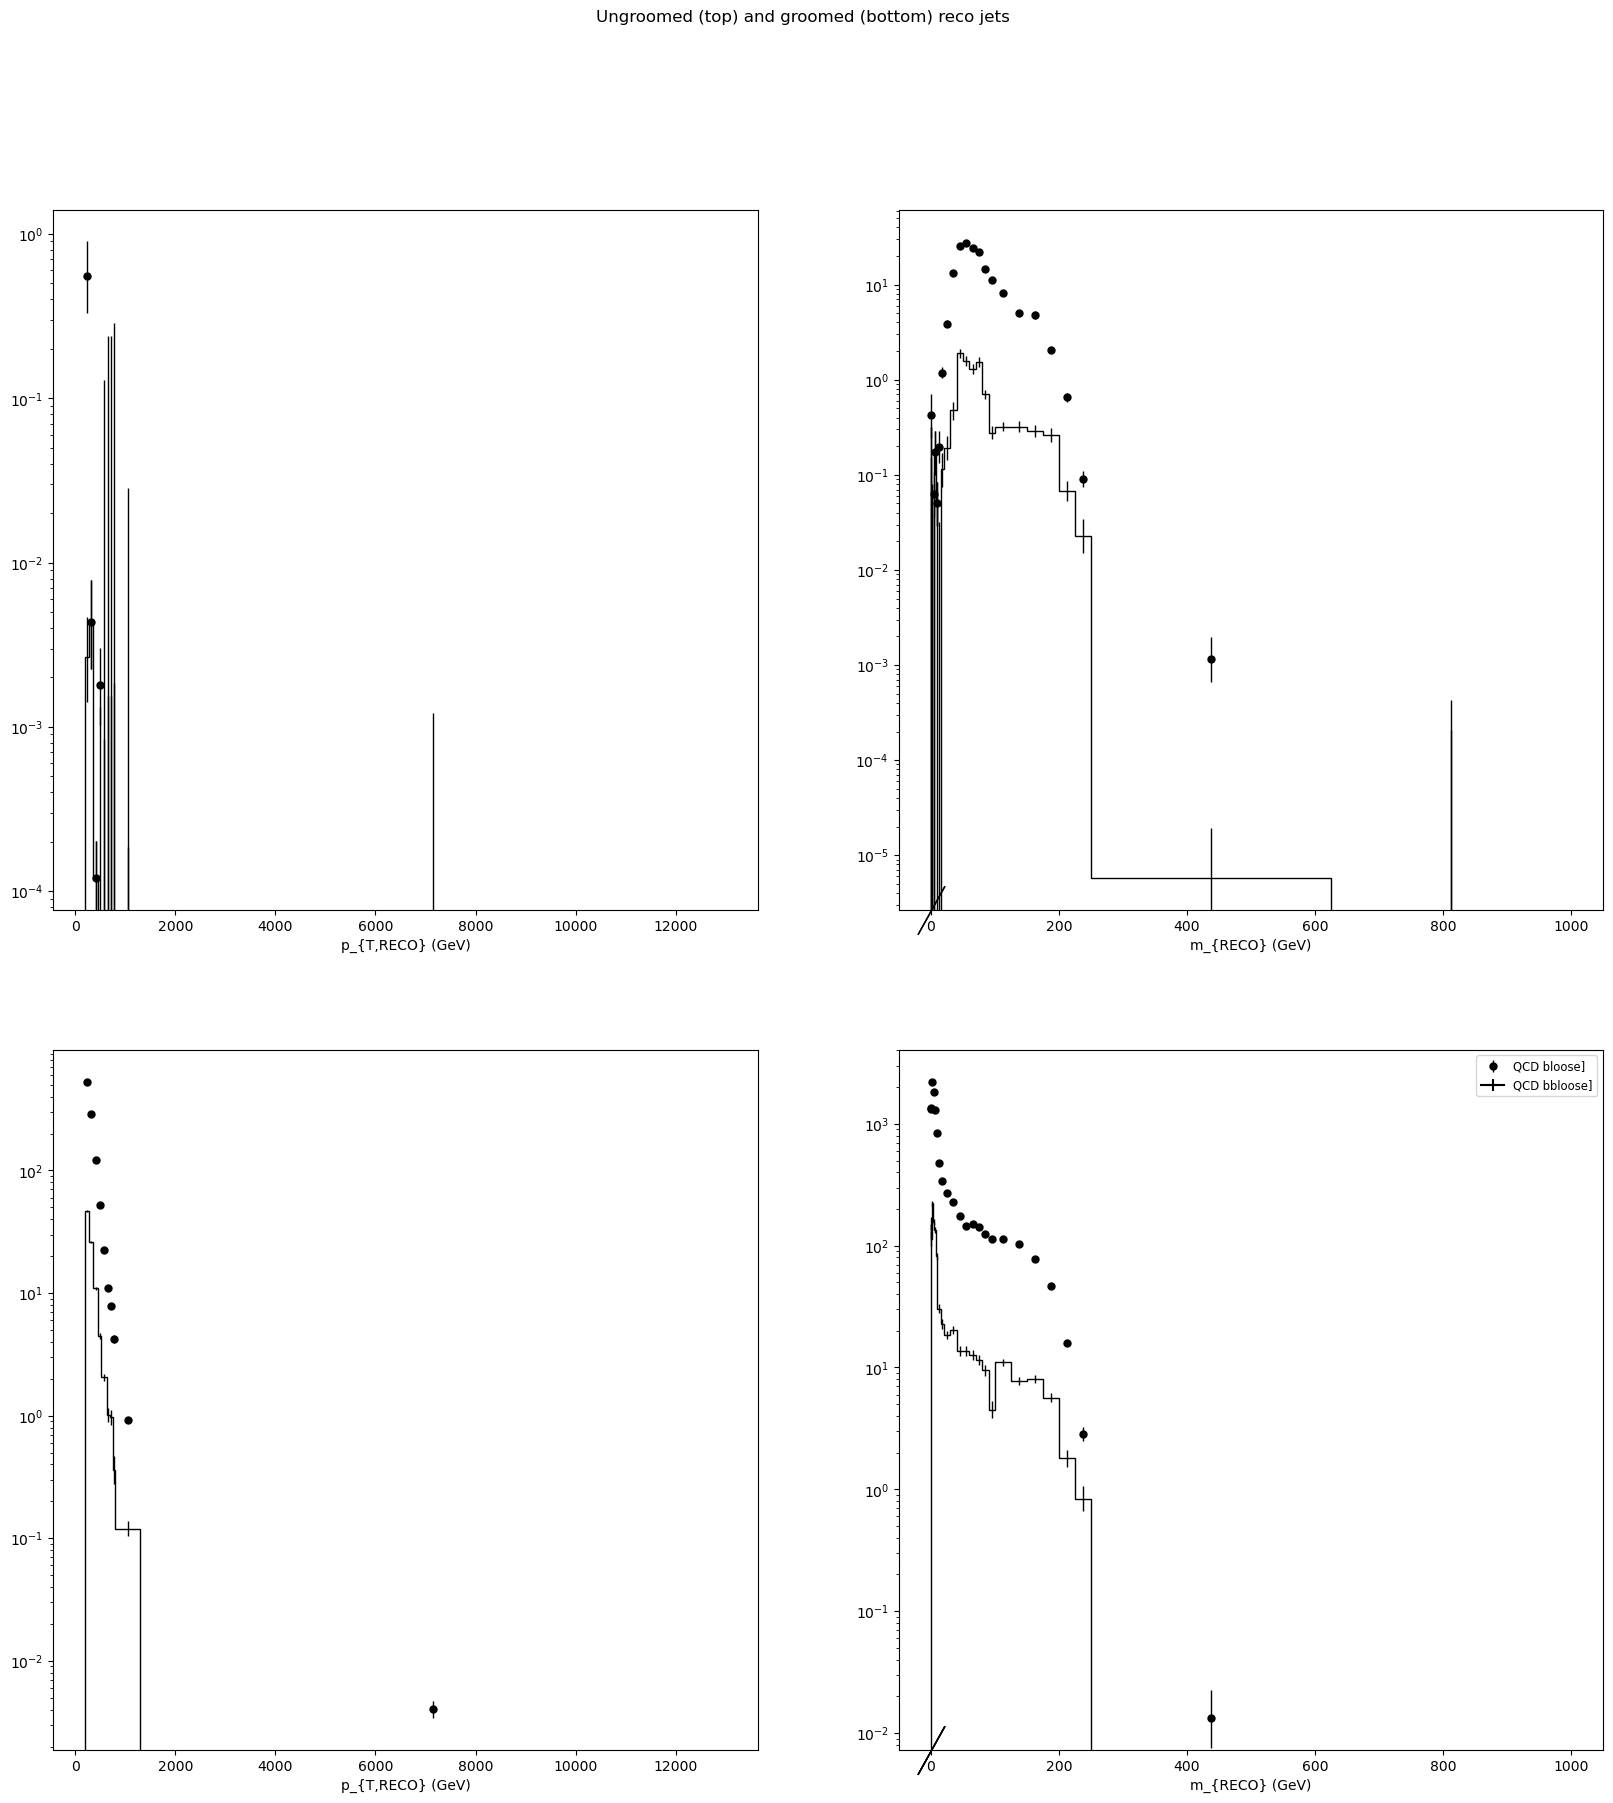

In [166]:
## plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed (top) and groomed (bottom) reco jets')
bloose = [result['response_matrix_u'][{'dataset':sum, 'mreco':j}].project('ptreco'), 
  result['response_matrix_u'][{'dataset':sum, 'ptreco':j}].project('mreco'), 
  result['response_matrix_g'][{'dataset':sum, 'mreco':j}].project('ptreco'), 
  result['response_matrix_g'][{'dataset':sum, 'ptreco':j}].project('mreco')]
bbloose = [result_bb['response_matrix_u'][{'dataset':sum, 'mreco':j}].project('ptreco'), 
  result_bb['response_matrix_u'][{'dataset':sum, 'ptreco':j}].project('mreco'), 
  result_bb['response_matrix_g'][{'dataset':sum, 'mreco':j}].project('ptreco'), 
  result_bb['response_matrix_g'][{'dataset':sum, 'ptreco':j}].project('mreco')]
for j, ax in enumerate(axs.flatten()):
    hep.histplot(bloose[j], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'black', linewidth=1,
                         label=['QCD bloose]'])
    hep.histplot(bbloose[j], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = 'black', linewidth=1,
                         label=['QCD bbloose]'])
    plt.rc('legend',fontsize='small')
    plt.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')
axs[0,1].set_yscale('log')
plt.rc('legend',fontsize='small')
plt.legend()
plt.savefig(os_path+"/xsScalingComparison.png")

[0.52876692 0.50024027 0.48721122 0.42464246 0.45017065 0.44544096
 0.45297505 0.49407115 0.44245142 0.72222222]
[  200.   280.   360.   450.   520.   630.   690.   750.   800.  1300.
 13000.]
[0.54096202 0.50643117 0.47679231 0.4583504  0.43018585 0.4430956
 0.42329873 0.42238392 0.41533255 0.3633678 ]
[  200.   280.   360.   450.   520.   630.   690.   750.   800.  1300.
 13000.]
[0.28571429        nan 0.06578947 0.19438285 0.44786333 0.5376578
 0.54568276 0.54824338 0.50940938 0.485      0.54959786 0.55900621]
[   0.    1.    5.   10.   20.   40.   60.   80.  100.  150.  200.  250.
 1000.]
[0.06711409        nan 0.06382979 0.19570905 0.46061602 0.54684905
 0.54911561 0.53607895 0.51225642 0.49075306 0.46253521 0.43121262]
[   0.    1.    5.   10.   20.   40.   60.   80.  100.  150.  200.  250.
 1000.]
[0.58052434 0.52001668 0.56063056 0.54809437 0.5782516  0.56486942
 0.51794872 0.58106884 0.50943396 0.50932339 0.53322166 0.48815166
 0.47876245 0.46812279 0.52563226 0.43815789 0.409

<Figure size 2000x2000 with 0 Axes>

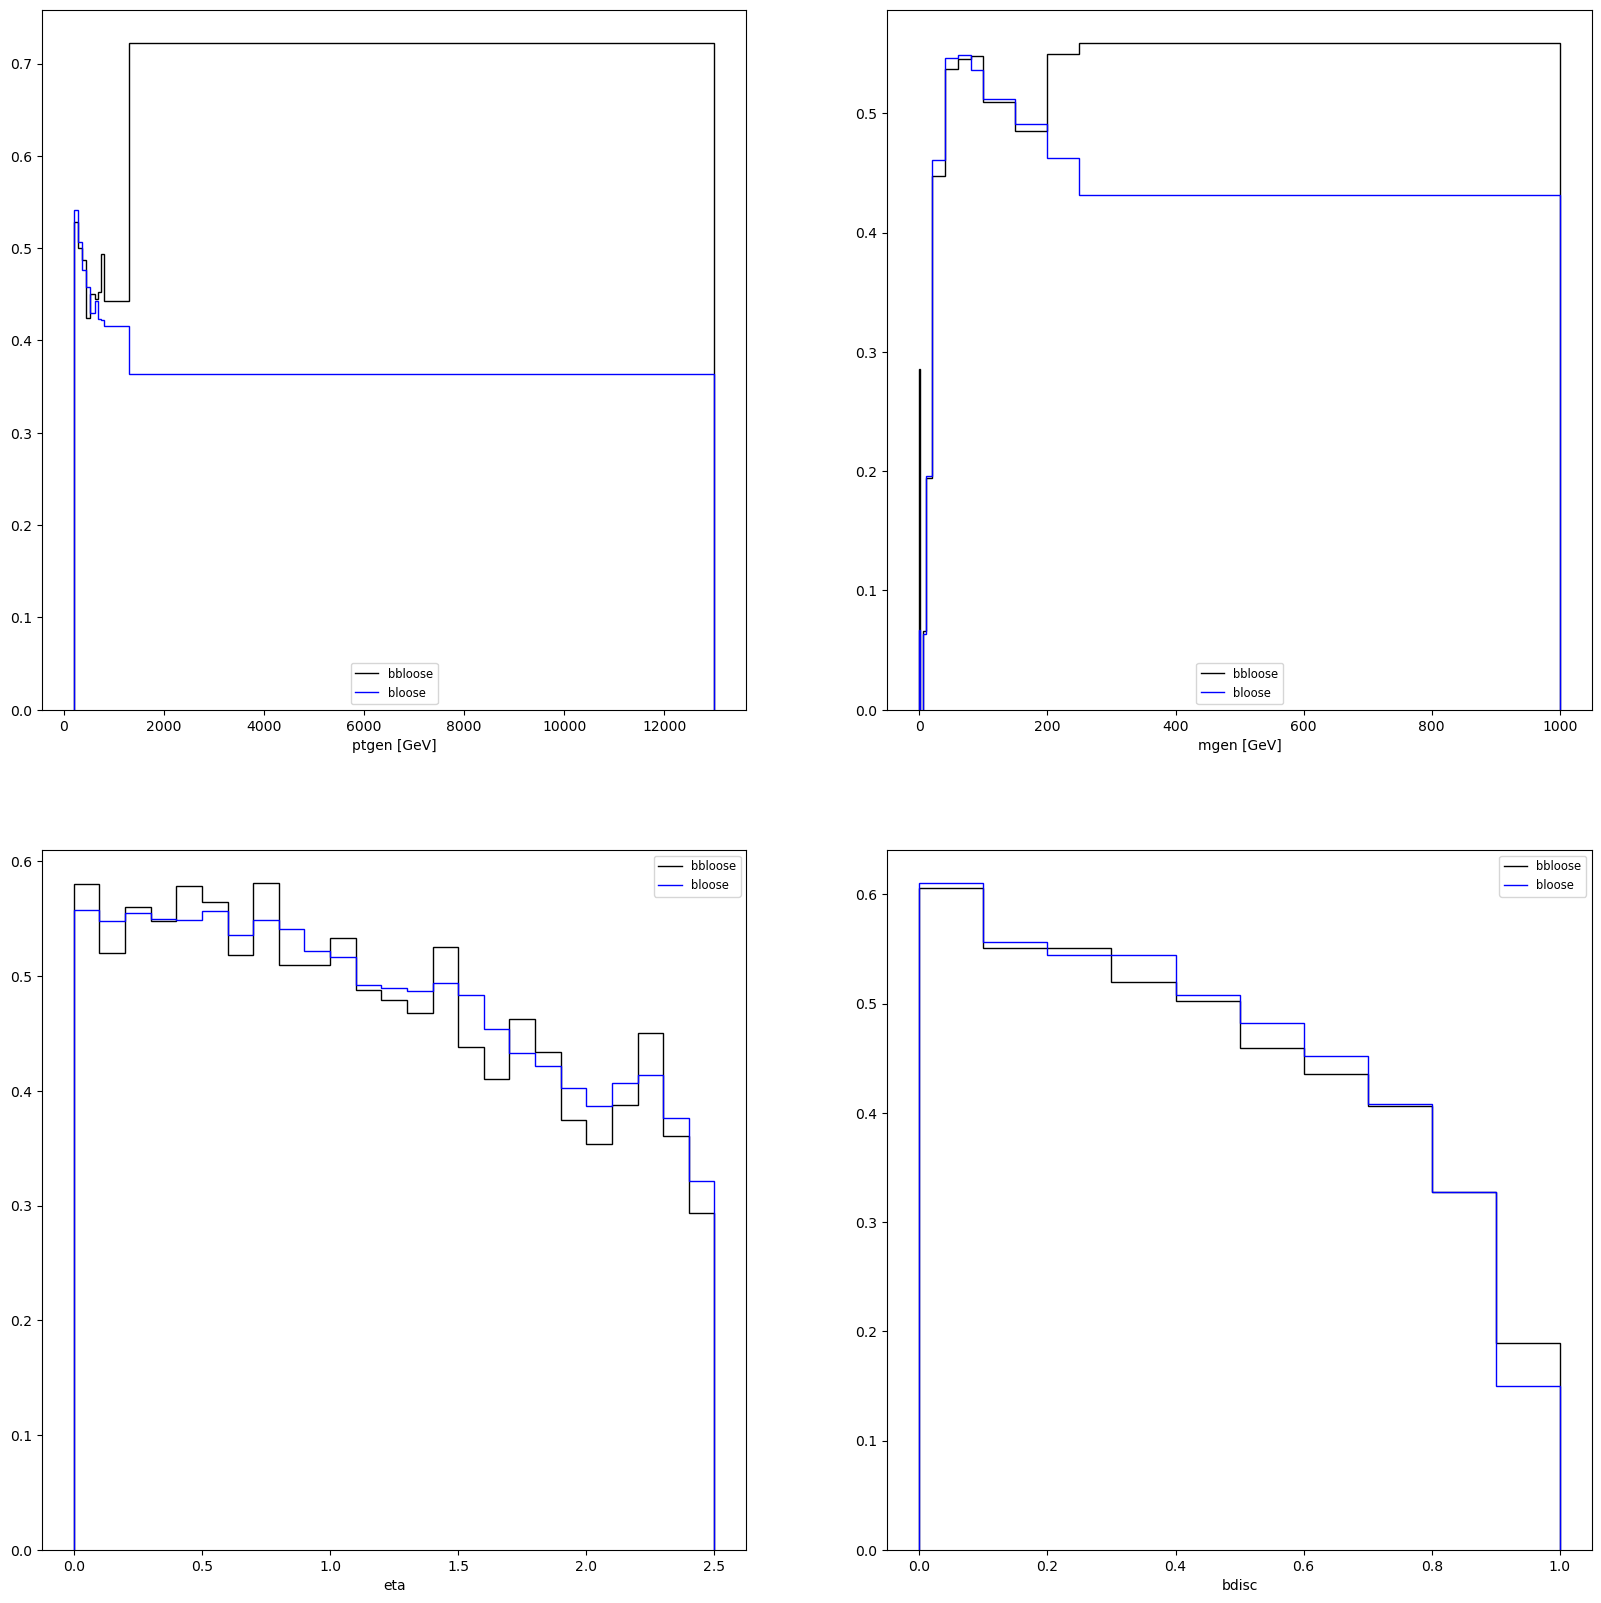

In [180]:
#### B TAG PLOTS OLD WAY
bloose_num = [result['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen'), 
  result['jet_mass'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mgen'), 
  result['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
            result['btag'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
  result['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
  result['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
            result['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bb['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen'), 
               result_bb['jet_mass'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mgen'), 
               result_bb['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bb['btag'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bb['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bb['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bb['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bb['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['ptgen [GeV]', 'mgen [GeV]', 'eta', 'bdisc']
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    print(ratio)
    print(num.axes.edges[0])
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='step',
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
for i, ax in enumerate(axs.flatten()):
    plotratio_cms(bbloose_num[i], bbloose_denom[i], axs.flatten()[i], 'k', 'bbloose')
    plotratio_cms(bloose_num[i], bloose_denom[i], axs.flatten()[i], 'b', 'bloose')
    ax.set_xlabel(xlabels[i])
    ax.legend()

[262743. 159436. 126555.  85290. 113380.  54825.  48616.  35695. 160719.
  60662.] [485692. 317565. 271357. 197448. 291763. 149032. 135160. 101885. 512180.
 276522.]
[2.50143e+05 1.20915e+05 5.55320e+04 1.90220e+04 1.26380e+04 3.50400e+03
 2.20200e+03 1.21900e+03 3.19100e+03 2.46000e+02] [462404. 238759. 116470.  41501.  29378.   7908.   5202.   2886.   7683.
    677.]
[12161. 34659. 57569. 48247. 64311. 27515. 22850. 15931. 62683. 26470.] [ 22193.  68154. 116991. 103550. 148937.  66895.  57207.  40512. 179151.
 109278.]
[  439.  3862. 13454. 18021. 36431. 23806. 23564. 18545. 94845. 33946.] [  1095.  10652.  37896.  52397. 113448.  74229.  72751.  58487. 325346.
 166567.]


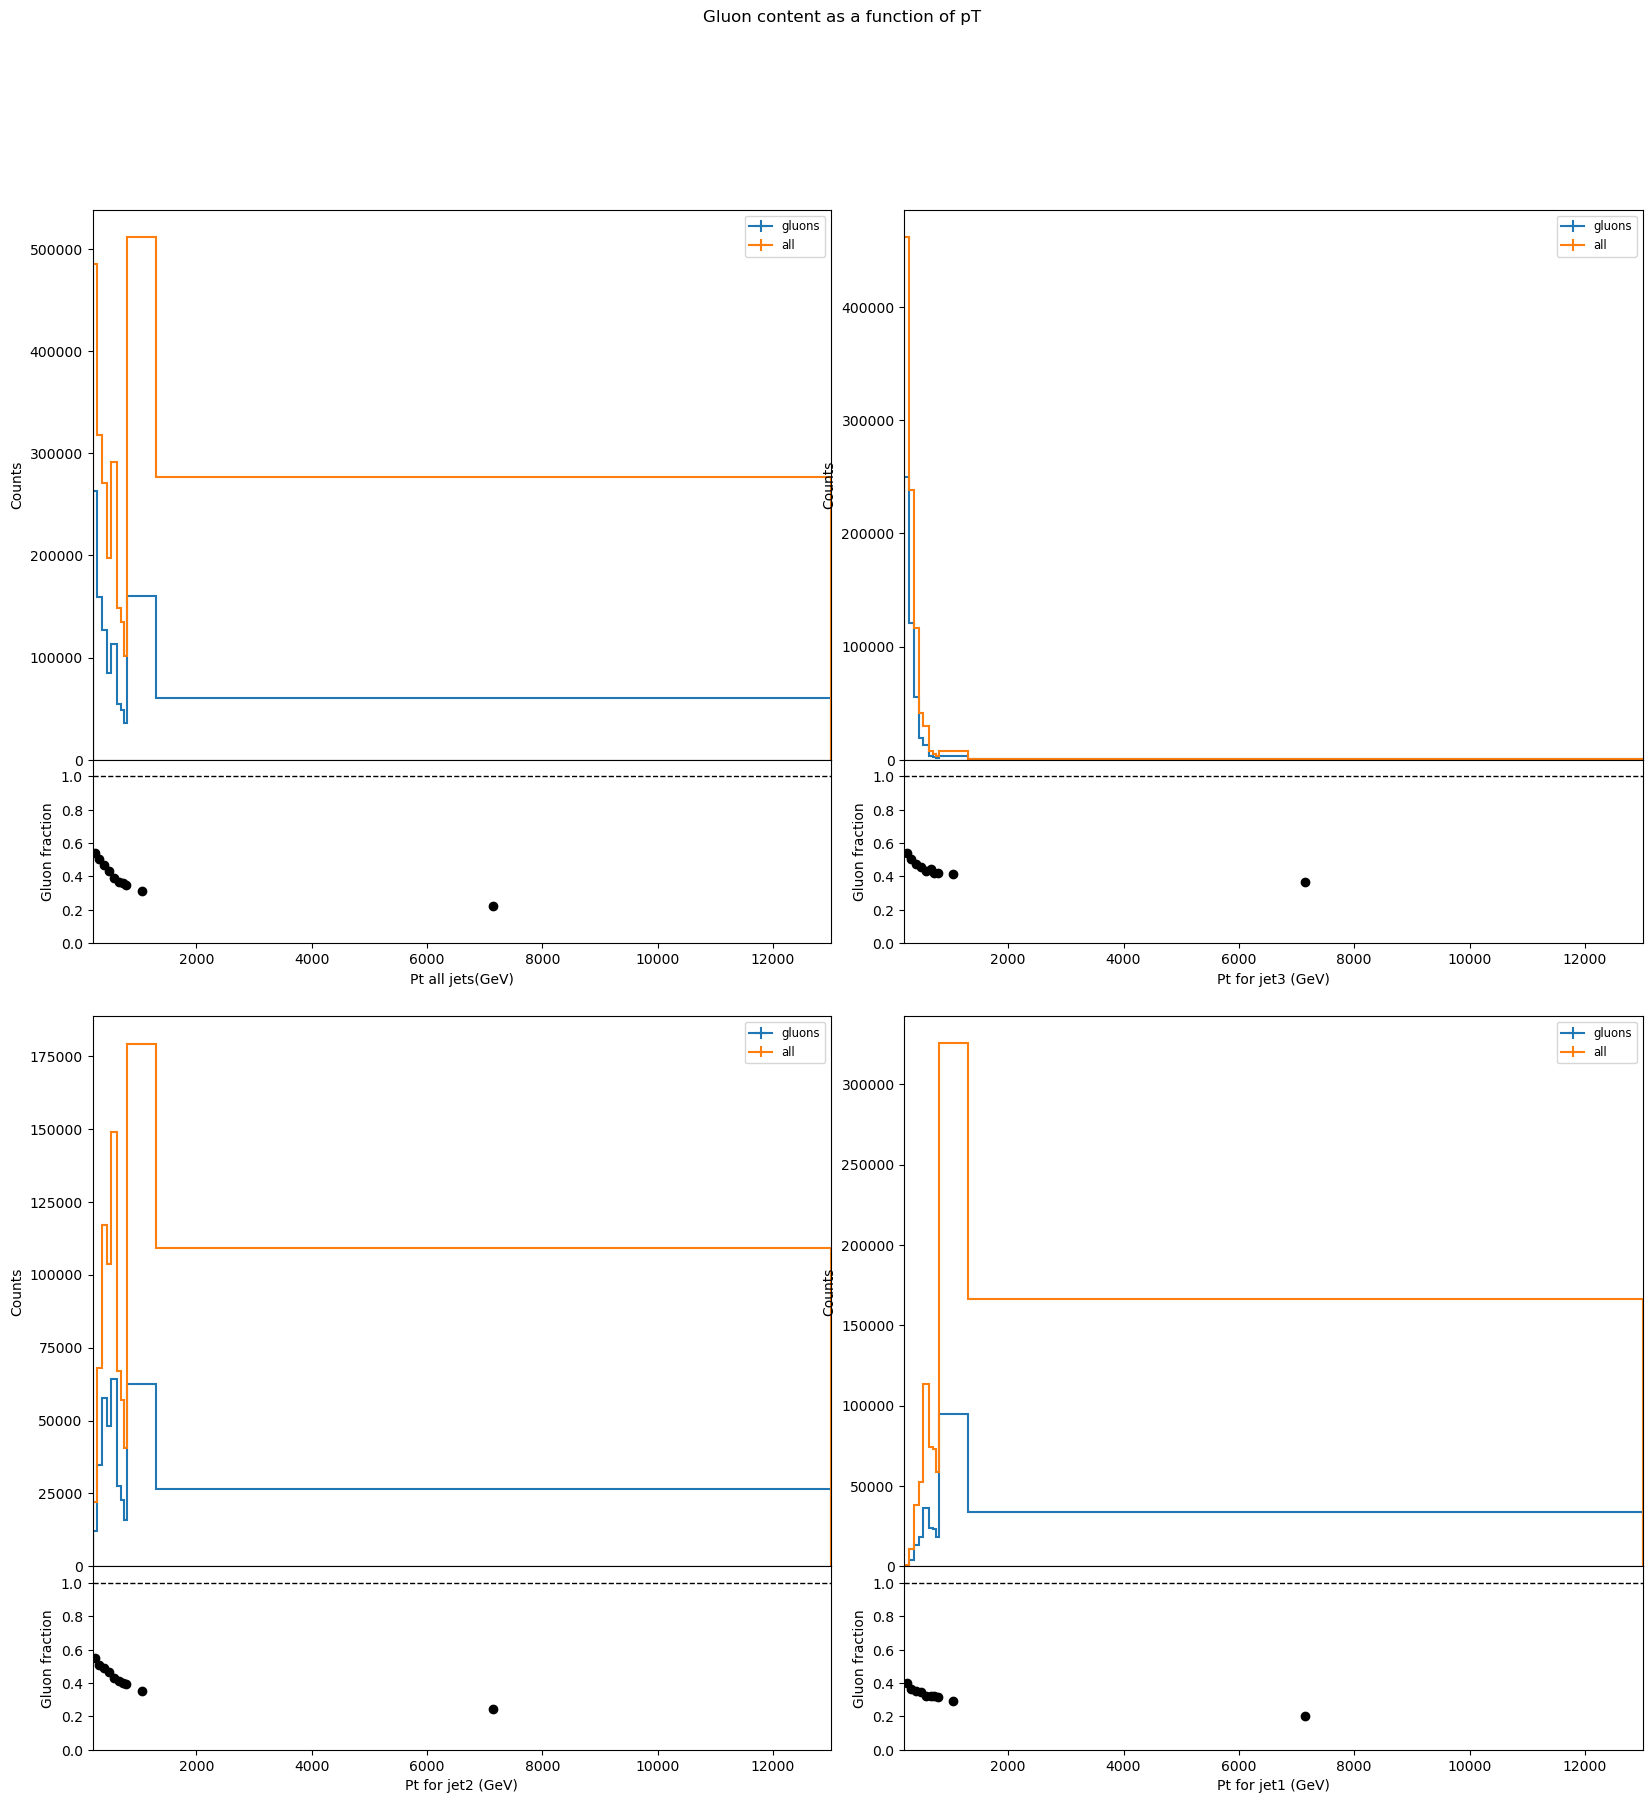

In [102]:


plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
grid = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
grid00 = grid[0,0].subgridspec(4,1, wspace=0, hspace=0)
grid01 = grid[0,1].subgridspec(4,1, wspace=0, hspace=0)
grid10 = grid[1,0].subgridspec(4,1, wspace=0, hspace=0)
grid11 = grid[1,1].subgridspec(4,1, wspace=0, hspace=0)
        
numerator = result['jet_pt'][{'partonFlav':'Gluon'}].project('ptgen')
denominator = result['jet_pt'].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid00[:-1, :])
subplot_ax = fig.add_subplot(grid00[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt all jets(GeV)")
plt.ylabel("Gluon fraction")

numerator = result['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen')
denominator = result['jet_pt'][{'jetNumb':'jet3'}].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid01[:-1, :])
subplot_ax = fig.add_subplot(grid01[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet3 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet2'}].project('ptgen')
denominator = result['jet_pt'][{'jetNumb':'jet2'}].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid10[:-1, :])
subplot_ax = fig.add_subplot(grid10[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet2 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet1'}].project('ptgen')
denominator = result['jet_pt'][{'jetNumb':'jet1'}].project('ptgen')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid11[:-1, :])
subplot_ax = fig.add_subplot(grid11[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet1 (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')
plt.savefig(os_path + "gluonPtFrac.png")